In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [41]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [42]:
df.shape

(600, 6)

In [43]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [44]:
df.min(),df.max()

(Undergrad                NO
 Marital.Status     Divorced
 Taxable.Income        10003
 City.Population       25779
 Work.Experience           0
 Urban                    NO
 dtype: object,
 Undergrad             YES
 Marital.Status     Single
 Taxable.Income      99619
 City.Population    199778
 Work.Experience        30
 Urban                 YES
 dtype: object)

In [45]:
df["Taxable.Income"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [46]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [47]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
df['Undergrad']=le_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']=le_encoder.fit_transform(df['Marital.Status'])
df['Urban']=le_encoder.fit_transform(df['Urban'])
df['Taxable.Income']=le_encoder.fit_transform(df['Taxable.Income'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [48]:
df.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int32
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

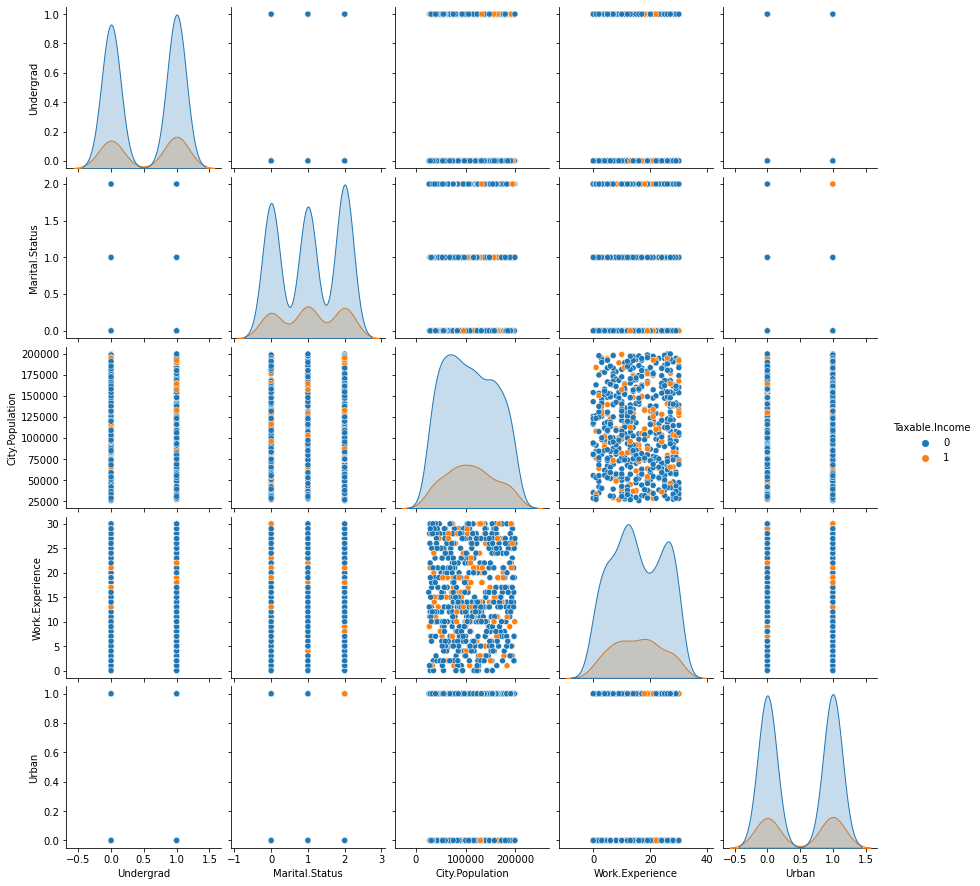

In [49]:
sns.pairplot(data=df,hue='Taxable.Income')

In [50]:
X=df.drop(['Taxable.Income'],axis=1)
y=df[['Taxable.Income']]

In [51]:
X.shape,y.shape

((600, 5), (600, 1))

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=12)

In [53]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=rf_model,param_grid={'criterion':['entropy','gini'],
                                           'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                                            cv=5
                                           )
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 5}
0.7949999999999999


In [55]:
rf_model = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=1)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
y_train_pred = rf_model.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [58]:
accuracy_score(y_train,y_train_pred)

0.7784313725490196

In [59]:
confusion_matrix(y_train,y_train_pred)

array([[397,   0],
       [113,   0]], dtype=int64)

In [60]:
y_test_pred=rf_model.predict(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [61]:
accuracy_score(y_test,y_test_pred)

0.8777777777777778

In [38]:
confusion_matrix(y_test,y_test_pred)

array([[79,  0],
       [11,  0]], dtype=int64)

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y,rf_model.predict_proba(X)[:,-1])
auc=roc_auc_score(y_train,y_train_pred)
print('Area under the curve : ',auc)

Area under the curve :  0.5


Text(0, 0.5, 'True Positive Rate')

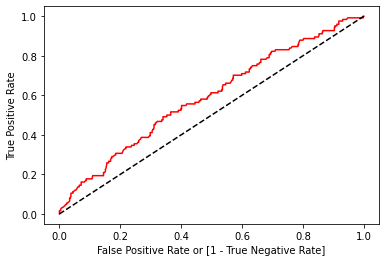

In [65]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model (area = %0.2f)'%auc)
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')